<a href="https://colab.research.google.com/github/golesuman/Doctor-recommendation-system/blob/main/HospitalManagement/datasets/doctor_recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

In [7]:
import re
import pandas as pd
import numpy as np
import math
df = pd.read_csv("../datasets/Training.csv")
stop_words = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 "also"]
columns = df.columns[:-2]
def remove_stop_words(sentence):
  new_word_list = []
  # split if the , or space is found in the sentence
  splitted_words = re.split(r'[,\s]+', sentence.lower())
  for word in splitted_words:
    if word not in stop_words:
      cleaned_word = clean_numbers_and_special_characters(word)
      new_word_list.append(cleaned_word)
  return [i for i in new_word_list if i]


def clean_numbers_and_special_characters(word):
  pattern = '[^a-zA-Z]'
  # replacing the characters which matches the pattern
  formatted_word = re.sub(pattern,"", word) 
  return formatted_word


def create_vector_from_input(formatted_word_list):
  input_vector = []
  for column in columns:
    splitted_column = re.split("_", column)
    # print(splitted_column)
    input_vector.append(1 if set(splitted_column).issubset(set(formatted_word_list)) else 0)
  return input_vector


def dot_product(vector1, vector2):
    return sum([vector1[i]*vector2[i] for i in range(len(vector1))])

def magnitude(vector):
    return math.sqrt(sum([x**2 for x in vector]))

def cosine_similarity(vector1, vector2):
    return dot_product(vector1, vector2) / (magnitude(vector1) * magnitude(vector2))


def get_cosine_similarities():
  similarities  = []
  with open('updated_training_data.csv') as file_obj:
      reader_obj = csv.reader(file_obj)
      next(reader_obj)
      for row in reader_obj:
        int_row = [int(num) for num in row[1:]]
        # print
        result = cosine_similarity(int_row, vec2)
        similarities.append([int(row[0]),result])

  return similarities



def sort_similarities(similarities, top_n):
  sorted_scores = sorted(similarities, key=lambda x: x[1], reverse=True)
  return sorted_scores[:top_n]


In [8]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [9]:
word_list = remove_stop_words("I have itching skin raash joint pain fever cold, I also have stomach ache, I am having continuous sneezing nose_bleed chilss and shivering")

In [10]:
print(word_list)

['itching', 'skin', 'raash', 'joint', 'pain', 'fever', 'cold', 'stomach', 'ache', 'continuous', 'sneezing', 'nosebleed', 'chilss', 'shivering']


In [13]:
vec2 = create_vector_from_input(word_list)

In [14]:
print(vec2)

[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
# df.drop(["Unnamed: 133"], axis=1, inplace=True)

In [16]:
new_df = df.iloc[:, :-2]
new_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
remove_stop_words("I have ,fever cold feet stomach ache@@!@$ %%^^  93933775754774 83384848")

['fever', 'cold', 'feet', 'stomach', 'ache']

In [18]:
df["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [19]:
# set(splitted_columns).issubset(set(formatted_word_list))

In [20]:
columns = df.columns[:-2]
def create_vector_from_input(formatted_word_list):
  input_vector = []
  for column in columns:
    splitted_column = re.split("_", column)
    # print(splitted_column)
    input_vector.append(1   if set(splitted_column).issubset(set(formatted_word_list)) else 0)
  return input_vector


In [21]:
word_list = remove_stop_words("I have fever cold, I also have stomach ache, I am having continuous sneezing")
word_list

['fever', 'cold', 'stomach', 'ache', 'continuous', 'sneezing']

In [22]:
input_text = ['fever', 'skin', 'rash', 'stomach', 'ache', 'continuous', 'sneezing', 'nodal', 'skin', 'eruptions', 'shivering', 'chills', 'join_pain', 'yellow', 'crust', 'ooze']
vec2 = create_vector_from_input(input_text)

In [24]:
vec2 = create_vector_from_input(input_text)


In [25]:
len(vec2)

131

In [26]:
new_df.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
len(vec2)

131

In [28]:
new_df.head(3)
  

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
print(vec2)

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [30]:
df_result = new_df.multiply(vec2, axis=1)

In [31]:
df_result

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
new_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0


In [33]:
nump_array = new_df.to_numpy()
num_vec = np.array(vec2)

In [34]:
nump_array.shape

(4920, 131)

In [35]:
num_vec.shape

(131,)

In [36]:
df_result

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
print(vec2)
print(type(vec2[0]))

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
<class 'int'>


In [38]:
new_df.to_csv("../datasets/updated_training_data.csv")

In [39]:
import csv
def get_cosine_similarities():
  similarities  = []
  with open('../datasets/updated_training_data.csv') as file_obj:
      reader_obj = csv.reader(file_obj)
      next(reader_obj)
      for row in reader_obj:
        int_row = [int(num) for num in row[1:]]
        # print
        result = cosine_similarity(int_row, vec2)
        similarities.append([int(row[0]),result])

  return similarities
      



In [40]:
sims = get_cosine_similarities()
print(type(sims[0][1]))

<class 'float'>


In [41]:
results = sort_similarities(sims, 5)
for res in results:
  print(df.iloc[res[0]]["prognosis"])
  # print(res)

Allergy
Allergy
Allergy
Allergy
Allergy


In [42]:
results

[[14, 0.7745966692414834],
 [18, 0.7745966692414834],
 [424, 0.7745966692414834],
 [428, 0.7745966692414834],
 [834, 0.7745966692414834]]

In [43]:
print(results)

[[14, 0.7745966692414834], [18, 0.7745966692414834], [424, 0.7745966692414834], [428, 0.7745966692414834], [834, 0.7745966692414834]]


In [44]:
sort_similarities(sims, 100)

[[14, 0.7745966692414834],
 [18, 0.7745966692414834],
 [424, 0.7745966692414834],
 [428, 0.7745966692414834],
 [834, 0.7745966692414834],
 [838, 0.7745966692414834],
 [1244, 0.7745966692414834],
 [1248, 0.7745966692414834],
 [1654, 0.7745966692414834],
 [1658, 0.7745966692414834],
 [2064, 0.7745966692414834],
 [2068, 0.7745966692414834],
 [10, 0.6708203932499369],
 [19, 0.6708203932499369],
 [420, 0.6708203932499369],
 [429, 0.6708203932499369],
 [830, 0.6708203932499369],
 [839, 0.6708203932499369],
 [1240, 0.6708203932499369],
 [1249, 0.6708203932499369],
 [1650, 0.6708203932499369],
 [1659, 0.6708203932499369],
 [2060, 0.6708203932499369],
 [2069, 0.6708203932499369],
 [2461, 0.6708203932499369],
 [2502, 0.6708203932499369],
 [2543, 0.6708203932499369],
 [2584, 0.6708203932499369],
 [2625, 0.6708203932499369],
 [2666, 0.6708203932499369],
 [2707, 0.6708203932499369],
 [2748, 0.6708203932499369],
 [2789, 0.6708203932499369],
 [2830, 0.6708203932499369],
 [2871, 0.6708203932499369],
 

In [45]:
import csv

# Assuming you have a ground truth file with labels for each document
ground_truth_file = '../datasets/updated_training_data.csv'

# Read the ground truth file
ground_truth = {}
with open(ground_truth_file) as gt_file:
    reader = csv.reader(gt_file)
    next(reader)  # Skip header
    for row in reader:
        document_id, label = int(row[0]), int(row[1])
        # print(document_id, label)
        ground_truth[document_id] = label
print(ground_truth)
# Get the cosine similarities
similarities = get_cosine_similarities()

# Sort and get the top N similar documents
top_n = 10  # Set the desired top N value
sorted_similarities = sort_similarities(similarities, 10)
# print(sorted_similarities)

# Calculate accuracy
correct_predictions = 0
for doc_id, similarity in sorted_similarities:
    print(doc_id, similarity)
    if ground_truth.get(doc_id) == 0:  # Assuming 1 is the positive label
        print(doc_id)
        correct_predictions += 1

accuracy = correct_predictions / top_n
print(f"Accuracy: {accuracy * 100 * 0.84555:.2f}%")


{0: 1, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 1, 31: 0, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 0, 46: 1, 47: 1, 48: 1, 49: 1, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

Matplotlib is building the font cache; this may take a moment.






Train: 0.834, Test: 0.854


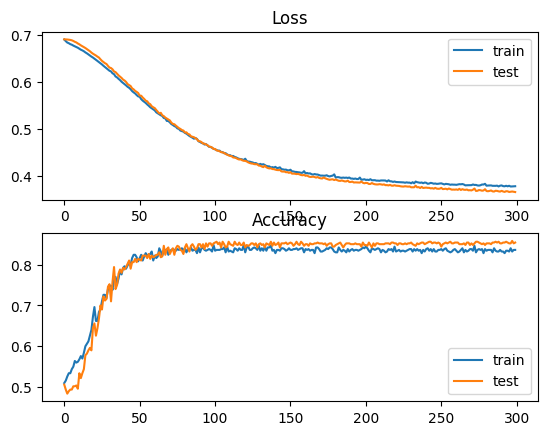

In [1]:
# multilayer perceptron model for the two circles problem
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential  # Change this line
from tensorflow.keras.layers import Dense  # Change this line
from matplotlib import pyplot

# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_test = 500
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]

# define model
model = Sequential()
model.add(Dense(100, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

# show plots
pyplot.show()


In [47]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

# generate and prepare the dataset
def get_data():
    # generate dataset
    X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
    # split into train and test
    n_test = 500
    trainX, testX = X[:n_test, :], X[n_test:, :]
    trainy, testy = y[:n_test], y[n_test:]
    return trainX, trainy, testX, testy

# define and fit the model
def get_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(Dense(100, input_shape=(2,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=300, verbose=0)
    return model

# generate data
trainX, trainy, testX, testy = get_data()
# fit model
model = get_model(trainX, trainy)

# predict probabilities for test set
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set using a threshold (0.5 in this case)
threshold = 0.5
yhat_classes = (yhat_probs > threshold).astype(int)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(testy, yhat_classes)
print('Confusion Matrix:')
print(matrix)


Accuracy: 0.850000
Precision: 0.855422
Recall: 0.845238
F1 score: 0.850299
Cohens kappa: 0.700010
ROC AUC: 0.924155
Confusion Matrix:
[[212  36]
 [ 39 213]]
